In [43]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import optimize
from functools import partial
from functools import wraps
from collections import namedtuple
from typing import Tuple
import warnings
from numpy import linalg

warnings.filterwarnings('ignore')

In [2]:
# for more beauty image
%matplotlib notebook

plt.rcParams['figure.figsize'] = [6, 5]

In [3]:
def middleware(params, func):
    '''Format data as list'''
    return error(func, params[0], params[1])

In [4]:
def plot_functional(func, title):
    '''Show functional'''
    a_possible = np.arange(-0.5, 2, 0.01)
    b_possible = np.arange(-0.5, 2, 0.01)
    A, B = np.meshgrid(a_possible, b_possible)
    Z = np.zeros((len(b_possible), len(a_possible)))
    for i in range(len(b_possible)):
        for j in range(len(a_possible)):
            Z[i][j] = error(func, a_possible[j], b_possible[i])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(A, B, Z, cmap=cm.coolwarm)
    ax.set_title(title, {'fontsize': 25}, pad=25)
    ax.set_xlabel('a', {'fontsize': 15})
    ax.set_ylabel('b', {'fontsize': 15})
    ax.set_zlabel('Error', {'fontsize': 15})
    fig.show()

In [5]:
def plot_lines_lvl(func, title, data, max_val=1000, step=50):
    '''Show lines of levels'''
    a_possible = np.arange(-0.5, 2, 0.01)
    b_possible = np.arange(-0.5, 2, 0.01)
    A, B = np.meshgrid(a_possible, b_possible)
    Z = np.zeros((len(b_possible), len(a_possible)))
    for i in range(len(b_possible)):
        for j in range(len(a_possible)):
            Z[i][j] = error(func, a_possible[j], b_possible[i])
    
    levels = [i for i in range(0, max_val, step)]
    plt.contour(A, B, Z, levels, colors='k')
    contour_filled = plt.contourf(A, B, Z, levels, cmap="RdBu_r")
    plt.colorbar(contour_filled)
    
    plt.title(title, {'fontsize': 20}, pad=25)
    plt.xlabel('a', {'fontsize': 15})
    plt.ylabel('b', {'fontsize': 15})
    
    plt.plot(data[0], data[1], color='red', label = 'way to minimum')
    plt.scatter(data[0],data[1], s=30, color='red', edgecolors='black')
    
    plt.legend(loc='best')
    plt.show()

In [6]:
DELTA = np.sqrt(np.finfo(float).eps)  # Config delta (for computing error)

In [7]:
def jacobian(params: Tuple[float, float], func):
    return optimize.approx_fprime(params, func, (DELTA, DELTA))

In [8]:
def hessian(params: Tuple[float, float], func):
    current_jac = partial(jacobian, func=func)
    
    diff_func_a = lambda point: current_jac(point)[0]
    diff_func_b = lambda point: current_jac(point)[1]
    
    return (optimize.approx_fprime(params, diff_func_a, (100 * DELTA, 100 * DELTA)),
           optimize.approx_fprime(params, diff_func_b, (100 * DELTA, 100 * DELTA)))

In [9]:
def points_to_vectors(points):
    '''Convert from list of points to pair of lists coordinates'''
    return [[i for i, _ in points], [j for _, j in points]] 

In [10]:
EPS = 0.001

In [11]:
SUPPOSE_MIN = np.random.uniform(-0.5, 1.5, 2)
print(f'Start optimisation {SUPPOSE_MIN}')

Start optimisation [-0.29478725  0.47733085]


In [133]:
# source coefficients
a, b = np.random.uniform(0, 1, 2)
k = 100
print(f'a = {a}', f'b = {b}', sep='\n')

a = 0.5713178864852949
b = 0.5461692081957075


In [134]:
# generate noisy data
x = np.arange(0, 1 + 1 / k, 1 / k)
d = np.random.normal(0, 1, k + 1)
y = a * x + b + d

In [135]:
# show data
plt.scatter(x, y, s=60, color='blue', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dependence y from x', {'fontsize': 20}, pad=20)
plt.grid()
plt.show()

In [132]:
a

array([[2.],
       [1.]])

In [15]:
def error(func, a, b):
    """function of errors"""
    return np.sum((func(a, b) - y) ** 2)

In [16]:
def linear(a, b):
    return a * x + b

<IPython.core.display.Javascript object>


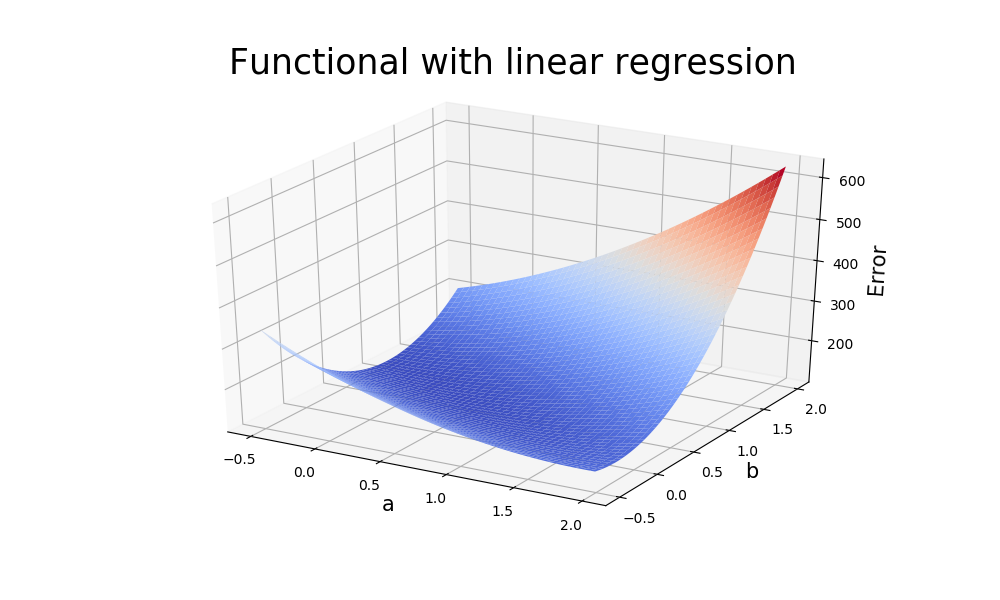

In [17]:
plot_functional(linear, 'Functional with linear regression')

In [46]:
f = partial(middleware, func=linear)

jacobian(SUPPOSE_MIN, f)

array([-50.23371696, -89.10613823])

In [61]:
jacobian(SUPPOSE_MIN, f).reshape(2, 1).reshape(2)

array([-50.23371696, -89.10613823])

In [88]:
0.1 * linalg.inv(q.dot(q.T)).dot(q)

array([[-0.00625],
       [ 0.     ]])

In [92]:
def newton_method(func):
    error_func = partial(middleware, func=func)
    current_jac = partial(jacobian, func=error_func)
    current_hess = partial(hessian, func=error_func)
    
    result = optimize.minimize(error_func, method='Newton-CG', jac=current_jac, hess=current_hess, x0=SUPPOSE_MIN,
                              options={'xtol': EPS, 'return_all': True})
    
    return result.x, result.nfev, result.njev, result.nit, result.allvecs, result.nhev

In [96]:
def simple(y, x):
    return lambda p: ((p[0] * x + p[1]) - y) ** 2

In [104]:
jacobian((1, 1), simple(1, 2))

array([8.00000006, 4.        ])

In [115]:
x

1.0

In [143]:
r = np.zeros((2, 2))
for x1, y1 in zip(x, y):
    j = jacobian((1, 1), simple(y1, x1)).reshape(2, 1)
    r += j.dot(j.T)
r

array([[222.44393967, 310.74252865],
       [310.74252865, 548.63170429]])

In [172]:
def pain(func):
    """work"""
    a = []
    m = np.array([1, 1])  # SUPPOSE_MIN  np.array([1, 1])
    a.append(m)
    cnt = 0 
    
    while cnt <= 5000:
#         print(m)
        
        r = np.zeros((2, 2))
        
        e = jacobian(m, func).reshape(2, 1)
        for x1, y1 in zip(x, y):
            j = jacobian(m, simple(y1, x1)).reshape(2, 1)
            r += j.dot(j.T)
        
        
        
        m = m.reshape(2, 1)
        m = m  - 0.01 * linalg.inv(r).dot(e)
        m = m.reshape(2)
        a.append(m)
        cnt += 1
    
    print(a[-1])
    return a

In [154]:
newton_method(linear)

(array([0.33945863, 0.6461507 ]),
 5,
 8,
 4,
 [array([-0.29478725,  0.47733085]),
  array([-0.05922755,  0.86290136]),
  array([0.35350626, 0.64017407]),
  array([0.33982169, 0.64596579]),
  array([0.33945863, 0.6461507 ])],
 4)

In [156]:
def pain(func):
    a = []
    m = np.array([1, 1])
    a.append(m)
    cnt = 0 
    
    while cnt <= 100:
        print(m)
        j = jacobian(m, func).reshape(2, 1)
        m = m.reshape(2, 1)
        m = m  + 1 * linalg.inv(j.dot(j.T)).dot(j)
        m = m.reshape(2)
        a.append(m)
        cnt += 1
    
    return a

[0.33944407 0.64615904]


<IPython.core.display.Javascript object>


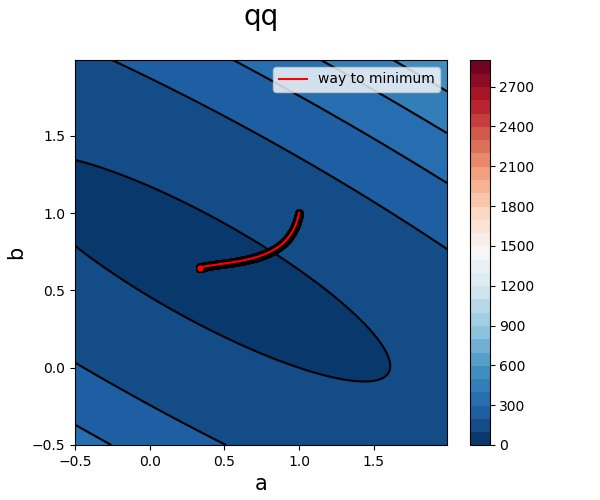

In [174]:
"""work"""
f = partial(middleware, func=linear)
path = pain(f)
plot_lines_lvl(linear, "qq", points_to_vectors(path), 3000, 100)

In [201]:
optimize.SR1()()

TypeError: 'SR1' object is not callable

In [197]:
def newton_method_sr1(func):
    error_func = partial(middleware, func=func)
    current_jac = partial(jacobian, func=error_func)
    
    result = optimize.minimize(error_func, method='Newton-CG', jac=current_jac, hess=optimize.SR1(), x0=SUPPOSE_MIN,
                              options={'xtol': EPS, 'return_all': True})
    
    return result.x, result.nfev, result.njev, result.nit, result.allvecs, result.nhev

In [193]:
newton_method(linear)

(array([0.33945863, 0.6461507 ]),
 5,
 8,
 4,
 [array([-0.29478725,  0.47733085]),
  array([-0.05922755,  0.86290136]),
  array([0.35350626, 0.64017407]),
  array([0.33982169, 0.64596579]),
  array([0.33945863, 0.6461507 ])],
 4)

In [199]:
newton_method_sr1(linear)

TypeError: 'SR1' object is not callable

In [175]:
a = jacobian((1, 1), lambda x: x[0]**2 + x[1]) 

In [27]:
a * a.T

array([4., 1.])

In [40]:
a.dot(a.T)

array([[4., 2.],
       [2., 1.]])

In [37]:
a = a.reshape(2, 1)

In [44]:
linalg.inv(a.dot(a.T))

LinAlgError: Singular matrix